App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_11556\850091050.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Size_MB"].fillna(df["Size_MB"].median(),inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_11556\850091050.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

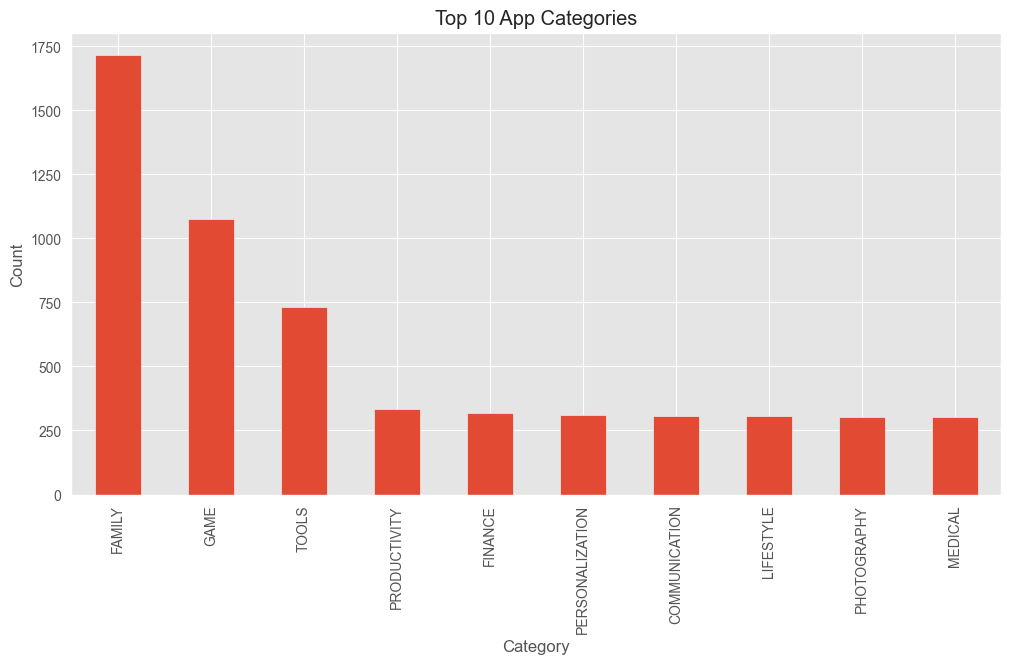

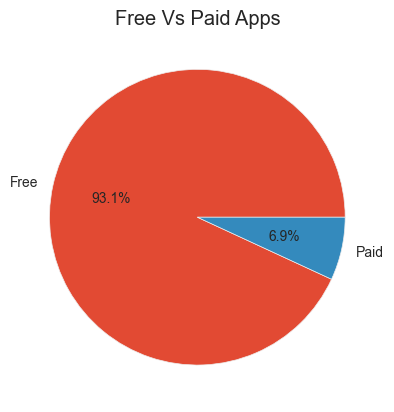

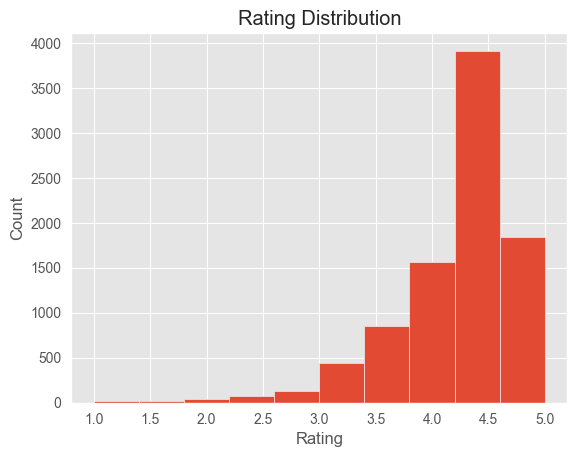

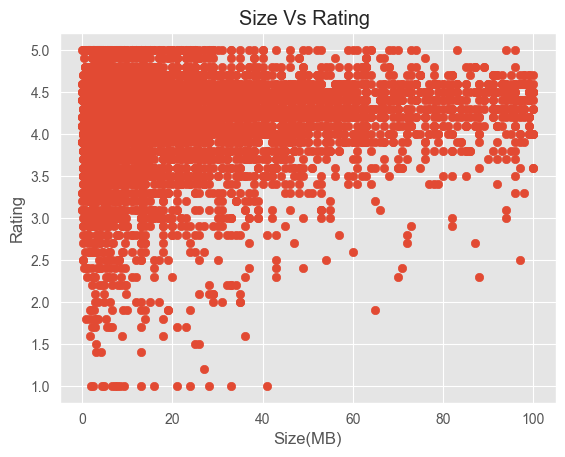

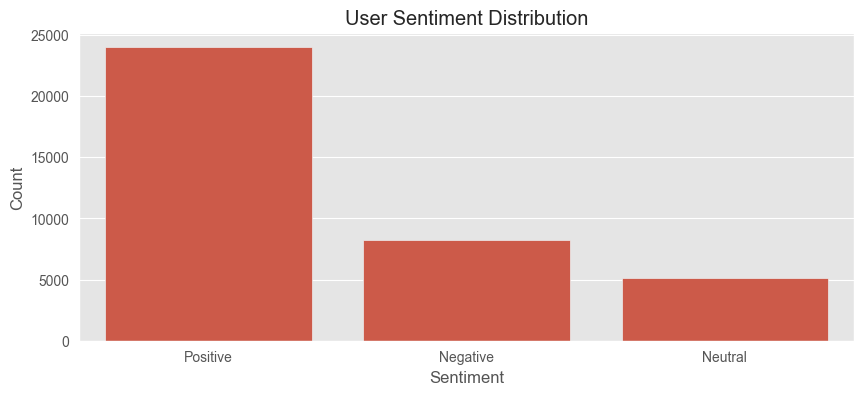

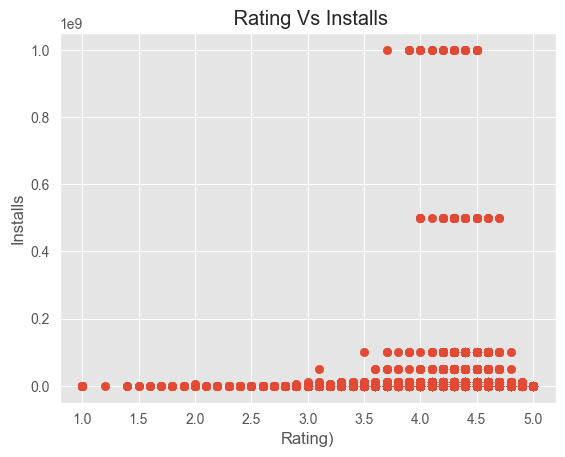

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyter_core.migrate import regex

df=pd.read_csv("googleplaystore.csv",)
reviews=pd.read_csv("googleplaystore_user_reviews.csv")

plt.style.use('ggplot')

#Removing Duplicates
df.drop_duplicates(inplace=True)

#Checking for null values
print(df.isnull().sum())

#Cleaning Installs column
df["Installs"] = (df["Installs"]
                  .str.replace("+","",regex=False)
                  .str.replace(",","",regex=False))
df["Installs"] = pd.to_numeric(df["Installs"],errors="coerce")

#Cleaninng price column
df["Price"] = (df["Price"].str.replace("$","",regex=False))

df["Price"] = pd.to_numeric(df["Price"],errors="coerce")

#Dropping rows
df.dropna(subset=["Installs","Price"],inplace=True)

#Clean reviews column
df["Reviews"] = df["Reviews"].astype(int)

#Convert size column
def convert_size(size):
    if "M" in size:
        return float(size.replace("M",""))
    elif "k" in size:
        return float(size.replace("k",""))/1024
    else:
        return np.nan

df["Size_MB"] = df["Size"].apply(convert_size)

#Handling missing size_Mb
df["Size_MB"].fillna(df["Size_MB"].median(),inplace=True)

#Clean type column
df["Type"].fillna("Free",inplace=True)

#Clean rating
df=df[df["Rating"] <= 5]
df["Rating"].fillna(df["Rating"].median(),inplace=True)

#EDA
#count of category(Bar-Chart)
plt.figure(figsize=(12,6))
df["Category"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 App Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

#free vs paid apps(Pie-Chart)
df["Type"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Free Vs Paid Apps")
plt.ylabel("")
plt.show()

#rating distribution(Histogram)
plt.hist(df["Rating"],bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

#size vs rating(Scatter-Plot)
plt.scatter(df["Size_MB"],df["Rating"])
plt.title("Size Vs Rating ")
plt.xlabel("Size(MB)")
plt.ylabel("Rating")
plt.show()

#sentiment analysis
sentiment = reviews["Sentiment"].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=sentiment.index,y=sentiment.values)
plt.title("User Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

#Rating Vs Installs
plt.scatter(df["Rating"],df["Installs"])
plt.title(" Rating Vs Installs")
plt.xlabel("Rating)")
plt.ylabel("Installs")
plt.show()

df.to_csv("Cleaned_GooglePlayStore.csv",index=False)




